<a href="https://colab.research.google.com/github/yuce-8/public-api-client/blob/main/Public_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# download & import the latest release

In [1]:
# GIT-CLONE for non Kaggle environments:
!git clone https://github.com/yuce-8/public-api-client.git
import sys
sys.path.insert(0,"public-api-client")
from y8_api_client_lib import Y8_API_CLIENT

Cloning into 'public-api-client'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 56 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), 330.20 KiB | 1.57 MiB/s, done.


# create a new Y8 Client with your ID
for R&D purposes we can use *johndoe* as ID

In [2]:
Y8 = Y8_API_CLIENT('johndoe')

# get the latest forecast
available forecasts are the following combinations:


1.   BTCUSD - 4hour
2.   BTCUSD - 30min
3.   ETHUSD - 4hour



In [3]:
import datetime
import traceback
import pytz
import json
import requests
import time
import concurrent.futures


f_0 = Y8.get_latest_forecast(symbol=Y8_API_CLIENT.BTCUSD, interval=Y8_API_CLIENT.INTERVAL_30MIN)

## analyse the forecast




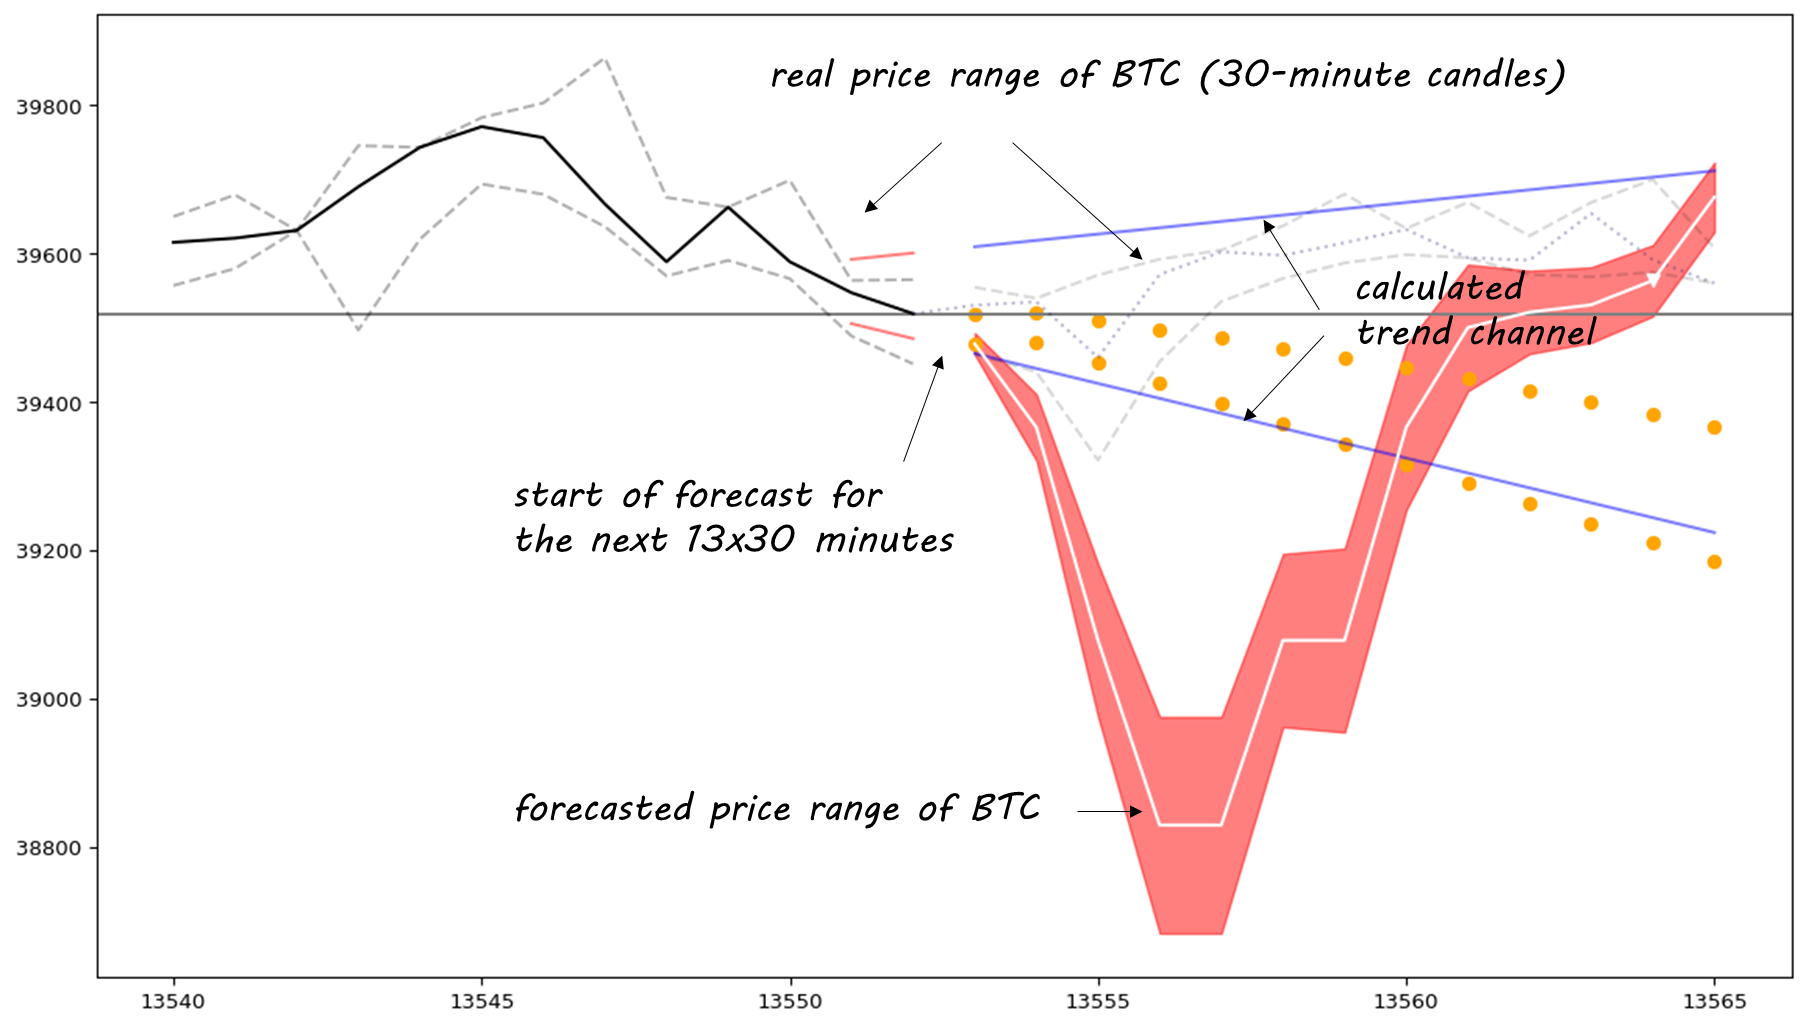


a forecast *f_0* has multiple parameters:


*   **forecast start date**: the date & time of the quote when the forecast was executed
*   **forecast start price**: the price of the quote in USD when the forecast was executed
*   **accuracy of backtesting**: the accuracy of the backtest that was executed for the selected model; level_1 measures the accuracy of positive / negative projections regarding the forecast start price (ie. is it above or below the starting price)
*   **forecasted prices top**: the upper range of the forecasted price projection
*   **forecasted prices bottom**: the lower range of the forecasted price projection
*   **forecasted resistance price**: the forecasted resistance that may have an impact on the price direction
*   **forecasted support price**: the forecasted support that may have an impact on the price direction
*   **calculated trendline #1 & #2**: the latest trends that shaped the price development in the past
*   **confidence top & bottom**: 80% confidence of the up & down price movements of the past 90 quotes projected into the future









In [4]:
accuracy_of_backtesting = f_0['level_1']
forecast_start_date = f_0['last_date']
forecast_start_price = f_0['last_quote']
forecasted_future_prices_top = f_0['quotes_forecast_top_incl_vola']
forecasted_future_prices_bottom = f_0['quotes_forecast_bottom_incl_vola']
forecasted_next_resistance_price = f_0['next_resistance']
forecasted_next_support_price = f_0['next_support']
calculated_trendline_1 = f_0['trendline_extended_1']
calculated_trendline_2 = f_0['trendline_extended_2']
price_confidence_bottom = f_0['confidence_extended_1']
price_confidence_top = f_0['confidence_extended_2']

# output
print('the forecast was executed at ', forecast_start_date, ' when the price was ', forecast_start_price)

print('for the next timesteps the following future price ranges were projected:')
for i in range(0, len(forecasted_future_prices_top)):
  print('\tt +', (i+1), ' ==> ]', round(forecasted_future_prices_bottom[i]), ', ', round(forecasted_future_prices_top[i]), '[')

print('the forecated next resistance price: ', round(forecasted_next_resistance_price))
print('the forecated next support price   : ', round(forecasted_next_support_price))

print('price confidence of the past 90 quotes:')
for i in range(0, len(price_confidence_bottom)):
  print('\tt +', (i+1), ' ==> [', round(price_confidence_bottom[i]), ', ', round(price_confidence_top[i]), ']')

the forecast was executed at  2022-09-30 11:14:02  when the price was  19589.060546875
for the next timesteps the following future price ranges were projected:
	t + 1  ==> ] 19572 ,  19589 [
	t + 2  ==> ] 19501 ,  19589 [
	t + 3  ==> ] 19463 ,  19589 [
	t + 4  ==> ] 19528 ,  19589 [
	t + 5  ==> ] 19508 ,  19610 [
	t + 6  ==> ] 19503 ,  19665 [
	t + 7  ==> ] 19500 ,  19599 [
	t + 8  ==> ] 19468 ,  19598 [
	t + 9  ==> ] 19435 ,  19597 [
	t + 10  ==> ] 19490 ,  19646 [
	t + 11  ==> ] 19478 ,  19672 [
	t + 12  ==> ] 19440 ,  19648 [
	t + 13  ==> ] 19406 ,  19638 [
the forecated next resistance price:  20240
the forecated next support price   :  19506
price confidence of the past 90 quotes:
	t + 1  ==> [ 19581 ,  19610 ]
	t + 2  ==> [ 19582 ,  19611 ]
	t + 3  ==> [ 19586 ,  19623 ]
	t + 4  ==> [ 19592 ,  19634 ]
	t + 5  ==> [ 19597 ,  19644 ]
	t + 6  ==> [ 19603 ,  19655 ]
	t + 7  ==> [ 19610 ,  19666 ]
	t + 8  ==> [ 19618 ,  19676 ]
	t + 9  ==> [ 19627 ,  19686 ]
	t + 10  ==> [ 19631 ,  19

# visualize the latest forecast

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.


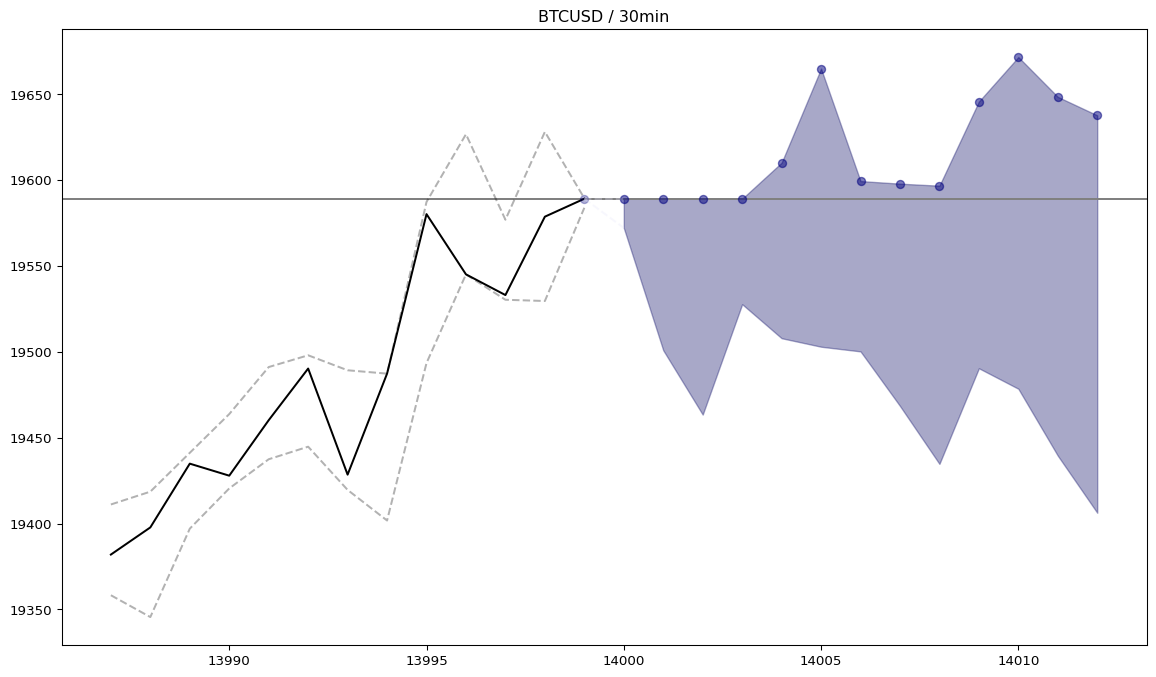

In [5]:
SYMBOL = Y8_API_CLIENT.BTCUSD
INTERVAL = Y8_API_CLIENT.INTERVAL_30MIN


# load the historical quotes:
df = Y8.get_historical_quotes(symbol=SYMBOL, interval=INTERVAL)

# load the lastest forecast:
forecast = Y8.get_latest_forecast(symbol=Y8_API_CLIENT.BTCUSD, interval=Y8_API_CLIENT.INTERVAL_30MIN)

# prepare plot
import matplotlib.pyplot as plt
import matplotlib as mpl

dpi = 96
width = 1400
height = 800 # 800
mpl.rcParams.update(mpl.rcParamsDefault)
fig = plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
plt.rcParams["axes.grid"] = False
plt.style.use("seaborn-bright")
plt.rcParams['axes.facecolor'] = 'white'
fig.patch.set_facecolor('white')

all_indizes = []
fill_colors = ['darkorange', 'mediumspringgreen', 'midnightblue']
color_counter = -1  
level_1 = forecast['level_1']
level_2 = forecast['level_2']
model_name = forecast['model_name']
training_date = forecast['training_date']
last_date_of_forecast = forecast['last_date']
last_quote_of_forecast = forecast['last_quote']
forecasted_values = forecast['forecast']

plot_history = len(forecasted_values)
tmp = df.tail(plot_history)
          
last_quotes = df['Close'].tail(plot_history).values
last_highs = df['High'].tail(plot_history).values
last_lows = df['Low'].tail(plot_history).values
indizes = df['Close'].tail(plot_history).index
indizes_2 = []

last_quote = df['Close'].tail(1).values[0]
indizes_forecast = range(indizes[-1] + 1, indizes[-1]+len(forecasted_values) + 1)
forecasted_future_prices_top = forecast['quotes_forecast_top_incl_vola']
forecasted_future_prices_bottom = forecast['quotes_forecast_bottom_incl_vola']

bridge_indizes = [indizes[-1], indizes_forecast[0]]
bridge_values_1 = [last_quote, forecasted_future_prices_top[0]]
bridge_values_2 = [last_quote, forecasted_future_prices_bottom[0]]

plt.axhline(y=last_quotes[-1], color='grey', linestyle='-')
plt.plot(indizes, last_quotes, color='black', label='Close')
plt.plot(indizes, last_lows, '--', alpha=0.3, color='black', label='High')
plt.plot(indizes, last_highs, '--', alpha=0.3, color='black', label='High')

a = 0.3
plt.fill_between(indizes_forecast, forecasted_future_prices_top, forecasted_future_prices_bottom, color=fill_colors[color_counter], alpha=a)
plt.fill_between(indizes_forecast, forecasted_future_prices_top, forecasted_future_prices_bottom, color=fill_colors[color_counter], alpha=0.1)
plt.plot(indizes[-1], last_quotes[-1], 'bo', label='Forecast', alpha=a, color='navy')
plt.plot(indizes_forecast, forecasted_future_prices_top, 'bo', label='Forecast', alpha=a, color='navy')
plt.plot(indizes_forecast, forecasted_future_prices_top, 'bo', label='Forecast', alpha=a, color='navy')

default_distance = (indizes_forecast[1] - indizes_forecast[0]) // 2
plt.plot(bridge_indizes, bridge_values_1, '--', color='lavender', alpha=a)
plt.plot(bridge_indizes, bridge_values_2, '--', color='lavender', alpha=a)
all_indizes = [*all_indizes, *indizes, *indizes_2]
  
plt.title(SYMBOL + ' / ' + INTERVAL)
all_indizes = list(set(all_indizes))[::2]
#plt.xticks(all_indizes, self.data.translate_index_into_date_formatted_as_string(all_indizes), rotation=30, ha='right')
plt.show()




# load the historical forecasts
all forecasts that were created in the past

In [6]:
import requests
import json

URL = 'https://storage.googleapis.com/y8-poc/trades/' + ('test' if Y8.CLIENT_ID is None else Y8.CLIENT_ID) + '-history-' + 'BTCUSD' + '-' + '30min' + '.json'
f_0_history = json.loads(requests.get(URL).text)

print('there are ', len(f_0_history), ' historical forecasts available:')

for historical_f_0 in f_0_history:
  h_forecast_start_date = historical_f_0['last_date']
  h_forecast_start_price = round(historical_f_0['last_quote'])
  print('\t historical forecast from ', h_forecast_start_date, ' / ', h_forecast_start_price)


there are  19  historical forecasts available:
	 historical forecast from  2022-09-27 15:44:02  /  20254
	 historical forecast from  2022-09-27 16:44:03  /  20211
	 historical forecast from  2022-09-27 17:44:15  /  20082
	 historical forecast from  2022-09-27 20:29:07  /  18912
	 historical forecast from  2022-09-28 17:59:01  /  19481
	 historical forecast from  2022-09-28 21:29:01  /  19483
	 historical forecast from  2022-09-28 21:29:01  /  19483
	 historical forecast from  2022-09-29 06:14:01  /  19533
	 historical forecast from  2022-09-29 12:14:06  /  19423
	 historical forecast from  2022-09-29 13:44:02  /  19510
	 historical forecast from  2022-09-29 16:14:02  /  18931
	 historical forecast from  2022-09-29 21:59:02  /  19418
	 historical forecast from  2022-09-30 03:44:02  /  19489
	 historical forecast from  2022-09-30 05:14:03  /  19374
	 historical forecast from  2022-09-30 06:44:03  /  19464
	 historical forecast from  2022-09-30 08:14:02  /  19477
	 historical forecast fro

# get the latest signal
Y8 tries to forecast the future price volatitily. A 2nd R&D projects tries to interpret these forecasts in terms of good and bad opportunities ("*signals*"). The Y8 team uses these *signals* to trade its own real money account.

A signal contains the following fields:

*   **ID**: a unique number
*   **DIRECTION**: is either *LONG* for a buy opportunity or *SHORT* for a sell opportunity. If the trade was closed in the real money depot the direction has the value *CLOSED*
*   **PRICE_OF_INVESTMENT**: the opening or closing price of the trade
*   **TIMESTAMP**: the datetime of the account operation





In [7]:
Y8.get_latest_signal(symbol=Y8_API_CLIENT.BTCUSD)

{'ID': 586746,
 'DIRECTION': 'CLOSED',
 'UNDERLYING': 'ETHUSD',
 'PRICE_OF_INVESTMENT': 19799.6,
 'TIMESTAMP': '2022-09-27 03:35:02'}